# Portfolio Optimization using Multiple Regression

### Imports

In [81]:
import warnings

In [82]:
warnings.filterwarnings('ignore') 

In [92]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Data Collection and Manipulation

Randomly chosen tickers (approximately 100)

In [84]:
technology = ["GOOGL", "TSLA", "AAPL", "MSFT", "NVDA", "INTC", "ADBE", "CRM", "IBM"]
consumer_discretionary = ["HD", "NKE", "MCD", "SBUX", "TGT", "LOW", "GM", "F"]
communication_services = ["META", "NFLX", "DIS", "CMCSA", "CHTR", "T", "VZ"]
consumer_staples = ["PG", "WMT", "KO", "PEP", "COST", "CL", "MDLZ", "KHC", "PM", "MO"]
energy = ["XOM", "CVX", "COP", "SLB", "KMI", "OXY", "PSX", "MPC", "EOG"]
financials = ["JPM", "BAC", "WFC", "C", "GS", "MS", "AXP", "V", "MA"]
healthcare = ["JNJ", "PFE", "MRK", "UNH", "ABT", "AMGN", "BMY", "MDT", "TMO"]
industrials = ["BA", "HON", "UPS", "MMM", "CAT", "UNP", "GE", "FDX", "RTX", "LMT"]
materials = ["ECL", "DD", "LIN", "SHW", "APD", "NEM", "FCX", "IP"]
real_estate = ["AMT", "PLD", "SPG", "CCI", "EQR", "PSA", "AVB", "O", "DLR"]
utilities = ["NEE", "DUK", "D", "SO", "AEP", "EXC", "ED", "SRE", "PEG"]

In [85]:
tickers = [technology, consumer_discretionary, communication_services, consumer_staples,
          energy, financials, healthcare, industrials, materials, real_estate, utilities]

#### Check if 'tickers' list has Multiple Occurances and Convert to Single Occurances

In [86]:
def check_ticker_occurances():
    # O(n) complexity
    for itr in range(len(tickers)):        
        # use set data structure to check for uniques
        if(len(set(tickers[itr])) != len(tickers[itr])):
            return True
    return False

def remove_multiple_ticker_occurances():
    # O(n) time complexity
    for itr in range(len(tickers)):
        if(len(set(tickers[itr])) != len(tickers[itr])):
            tickers[itr] = list(set(tickers[itr]))
    print(f'Removed Multiple Occurances of Tickers!')

if check_ticker_occurances():
    print(f'Multiple occurances of tickers found!')
    remove_multiple_ticker_occurances()
else:
    print(f'Single Occurances found!')

Single Occurances found!


#### Download 6 years of stock data from Yahoo Finance

In [87]:
data_technology = yf.download(technology, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_consumer_discretionary = yf.download(consumer_discretionary, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_communication_services = yf.download(communication_services, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_consumer_staples = yf.download(consumer_staples, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_energy = yf.download(energy, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_financials = yf.download(financials, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_healthcare = yf.download(healthcare, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_industrials = yf.download(industrials, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_materials = yf.download(materials, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_real_estate = yf.download(real_estate, start="2018-01-01", end="2024-01-01")["Adj Close"]
data_utilities = yf.download(utilities, start="2018-01-01", end="2024-01-01")["Adj Close"]

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


In [88]:
data_technology.head()

Ticker,AAPL,ADBE,CRM,GOOGL,IBM,INTC,MSFT,NVDA,TSLA
Date,,,,,,,,,
2018-01-02,40.670971,177.699997,104.273796,53.660500,109.547653,39.740650,80.080933,49.310471,21.368668
2018-01-03,40.663902,181.039993,105.152641,54.576000,112.558899,38.391918,80.453621,52.555786,21.150000
2018-01-04,40.852772,183.220001,106.540833,54.787998,114.838646,37.687862,81.161697,52.832832,20.974667
2018-01-05,41.317894,185.339996,107.958977,55.514500,115.399696,37.950821,82.167969,53.280540,21.105333
2018-01-08,41.164433,185.039993,108.717987,55.710499,116.095680,37.950821,82.251816,54.913097,22.427334


In [89]:
data_financials.head()

Ticker,AXP,BAC,C,GS,JPM,MA,MS,V,WFC
Date,,,,,,,,,
2018-01-02,90.506516,25.813889,60.055393,222.359299,90.125519,146.724625,43.327950,109.733658,50.917603
2018-01-03,91.064507,25.727558,60.241142,220.289398,90.217323,148.569443,43.444183,110.826111,51.309349
2018-01-04,92.579170,26.064264,60.984161,223.368149,91.509773,150.491516,44.108341,111.238152,51.951141
2018-01-05,92.790314,26.185131,60.903389,222.228851,90.922302,153.611267,44.091724,113.902206,52.301189
2018-01-08,91.936592,26.003832,60.192677,219.002228,91.056572,154.075592,43.909088,114.362167,51.709423


#### Check Five-Point Statistics of the Technology Sector

In [90]:
data_technology.describe()

Ticker,AAPL,ADBE,CRM,GOOGL,IBM,INTC,MSFT,NVDA,TSLA
count,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000,1509.000000
mean,108.703984,392.130424,185.819635,91.191814,113.194444,43.167984,208.665323,157.322924,145.981504
std,51.349589,126.950047,44.942261,31.348486,15.004271,8.353558,84.088719,122.337774,113.530192
min,34.075401,177.699997,103.894287,49.233501,74.493607,24.072258,79.205132,31.521748,11.931333
25%,51.655396,277.570007,151.372269,60.221001,103.101753,38.362076,129.248688,59.652145,22.271334
50%,121.447411,373.440002,176.409561,88.019997,110.418289,44.100735,216.065140,131.212036,160.190002
75%,151.446213,489.269989,218.514557,119.699997,121.654510,49.373734,278.286041,212.313416,242.190002
max,197.857529,688.369995,309.555634,149.838501,163.221939,62.730934,381.993622,504.022034,409.970001


#### Visualize Each Sector Data

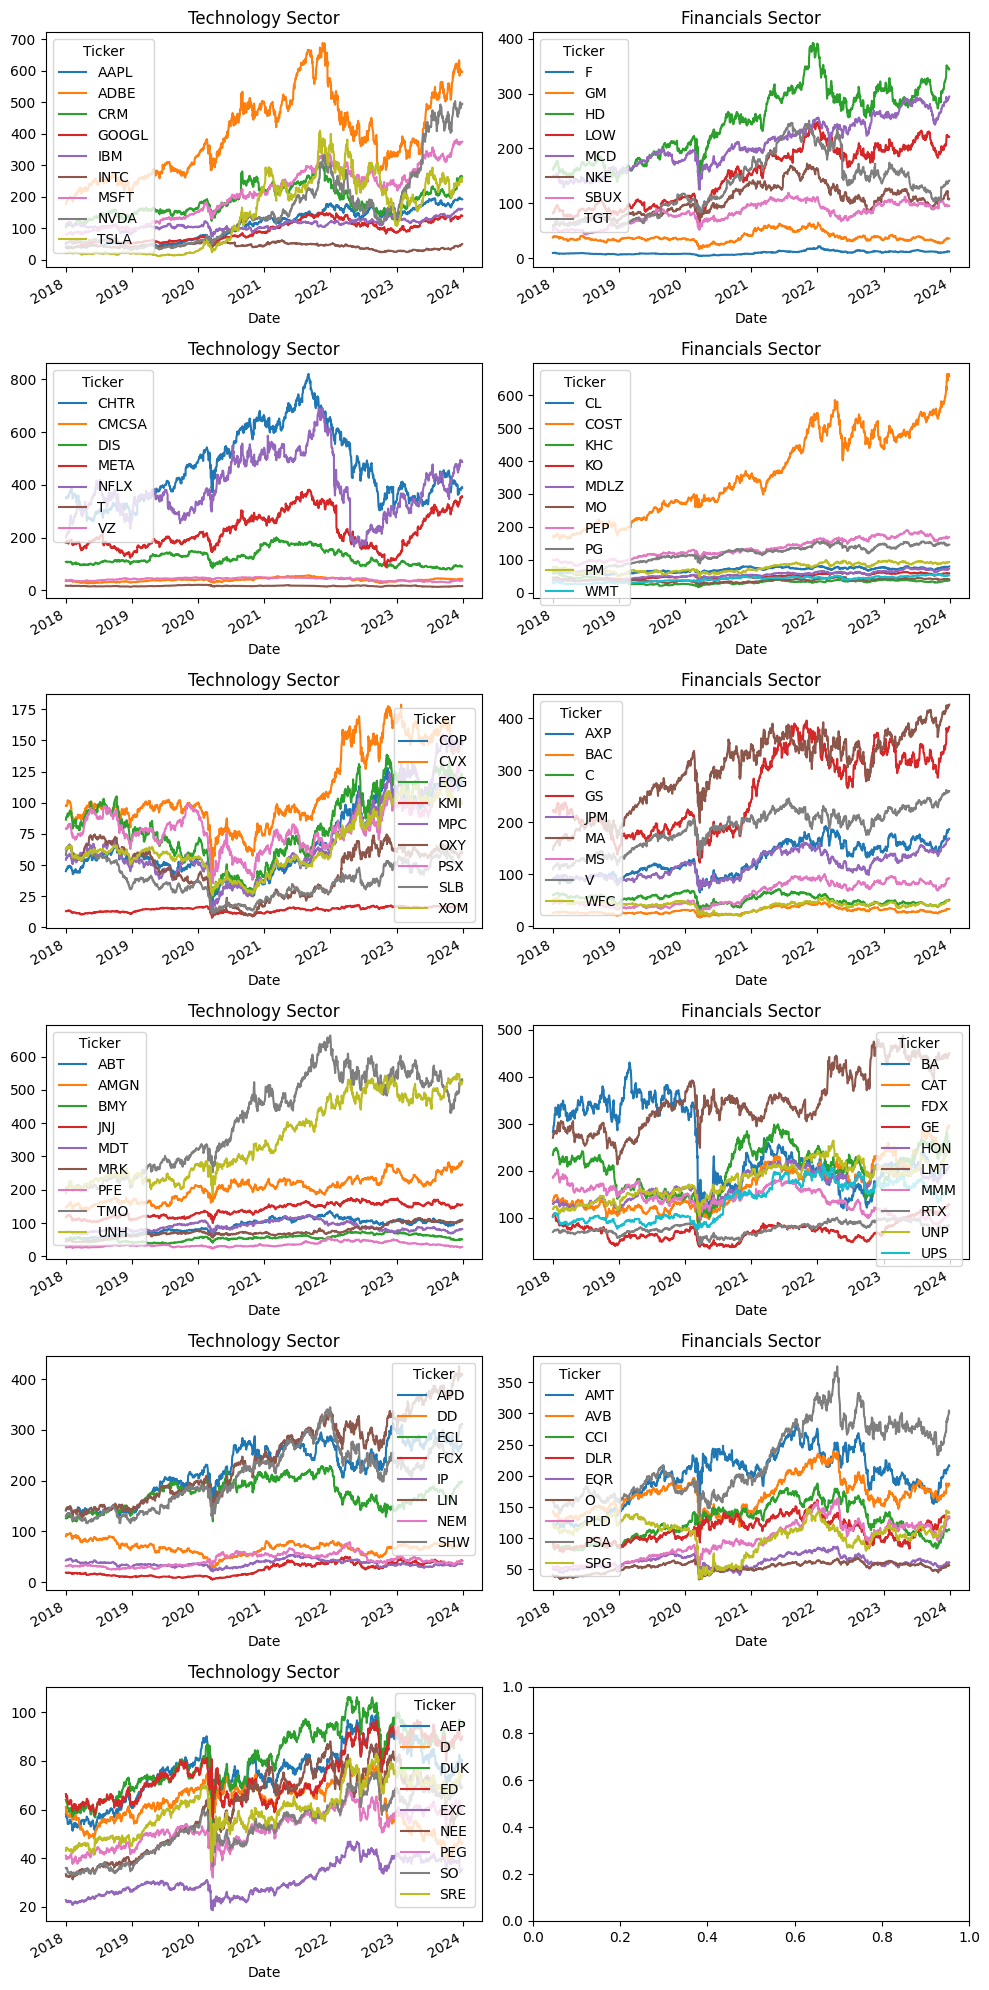

In [117]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (10, 20))

data_technology.plot(ax = axes[0][0], title = 'Technology Sector', legend = True)
data_consumer_discretionary.plot(ax=axes[0][1], title = 'Consumer Discretionary', legend = True)
data_communication_services.plot(ax = axes[1][0], title = 'Communication Services', legend = True)
data_consumer_staples.plot(ax=axes[1][1], title = 'Consumer Staples', legend = True)
data_energy.plot(ax = axes[2][0], title = 'Energy', legend = True)
data_financials.plot(ax=axes[2][1], title = 'Financials', legend = True)
data_healthcare.plot(ax = axes[3][0], title = 'Healthcare', legend = True)
data_industrials.plot(ax=axes[3][1], title = 'Industrials', legend = True)
data_materials.plot(ax = axes[4][0], title = 'Materials', legend = True)
data_real_estate.plot(ax=axes[4][1], title = 'Real Estate', legend=True)
data_utilities.plot(ax = axes[5][0], title = 'Technology Sector', legend=True)

plt.tight_layout()

plt.show()

## Feature Engineering

### 1. Calculate log returns

In [11]:
log_returns = data.apply(lambda x: np.log(x) - np.log(x.shift(1)))
log_returns = log_returns.iloc[1:]

In [12]:
log_returns.head()

Ticker,AAPL,ABT,ADBE,AEP,AMGN,AMT,AMZN,APD,AVB,AXP,...,TMO,TSLA,UNH,UNP,UPS,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,-0.000174,0.002209,0.018621,-0.008460,0.018694,0.003889,0.012694,0.005423,0.003098,0.006147,...,0.018178,-0.010286,0.010435,0.005582,0.021914,0.009906,-0.020763,0.007664,0.008685,0.019450
2018-01-04,0.004634,-0.001699,0.011970,-0.011909,-0.004223,-0.014718,0.004466,0.003839,-0.018048,0.016496,...,0.012440,-0.008325,0.004331,-0.005435,0.006466,0.003711,0.003237,0.012430,0.000904,0.001383
2018-01-05,0.011321,0.002886,0.011504,-0.002116,0.005941,0.006425,0.016033,0.008346,-0.002007,0.002278,...,0.016992,0.006210,0.018889,0.012659,0.003061,0.023667,-0.002284,0.006716,0.005910,-0.000806
2018-01-08,-0.003721,-0.002886,-0.001620,0.008718,-0.000276,0.010619,0.014322,0.001068,0.000746,-0.009243,...,0.001629,0.060755,-0.017509,0.013792,0.012072,0.004030,-0.001717,-0.011379,0.014672,0.004486
2018-01-09,-0.000115,0.001699,0.008931,-0.011831,0.015276,-0.006783,0.004665,0.002547,-0.007598,0.003687,...,0.016536,-0.008118,0.004971,0.011125,-0.000465,-0.001929,-0.003674,0.003540,-0.012079,-0.004255


In [13]:
log_returns.shape

(1508, 100)

### 2. Calculate P/E Ratio

In [14]:
PE_ratio = [] 
PE_tickers = []

for ticker in tickers:
    PE_tickers.append(ticker)
    ticker_info = yf.Ticker(ticker).info
    if "forwardPE" in ticker_info:
        PE_ratio.append(ticker_info["forwardPE"])
    else:
        PE_ratio.append(None)
dict = {"Ticker": PE_tickers, "P/E": PE_ratio}

PE_data = pd.DataFrame(dict)

In [15]:
PE_data.head()

,Ticker,P/E
0,GOOGL,19.774235
1,NEM,10.860120
2,OXY,14.842634
3,FCX,21.836819
4,CVX,11.047124


In [16]:
PE_data.shape

(100, 2)

### 3. Calculate Beta

In [17]:
def calc_beta(ticker):
    
    # calculate covariance
    covariance = daily_returns_individual_stocks[ticker].cov(daily_returns_sp500)

    # calculate Beta
    beta = covariance / variance_sp500

    stock.append(ticker)
    betas.append(beta)

stock = []
betas = []

# download data of S&P500
data_sp500 = yf.download("^GSPC", start="2018-01-01", end="2024-01-01")["Adj Close"]

# calculate daily returns of S&P500
daily_returns_sp500 = data_sp500.pct_change()

# calculate variance of S&P500
variance_sp500 = data_sp500.pct_change().var()

# calculate daily returns of individual stocks
daily_returns_individual_stocks = pd.DataFrame()
for ticker in tickers:
    daily_returns_individual_stocks[ticker] = data[ticker].pct_change()

for ticker in tickers:
    calc_beta(ticker)

dict = {"Ticker": stock, "Beta": betas}
betas = pd.DataFrame(dict)

[*********************100%%**********************]  1 of 1 completed


In [18]:
betas.head()

,Ticker,Beta
0,GOOGL,1.161100
1,NEM,0.376435
2,OXY,1.327682
3,FCX,1.537255
4,CVX,1.009280


In [19]:
betas.shape

(100, 2)

### 4. Correlation between Assets

In [20]:
correlation_matrix = data.corr()

correlation_matrix

Ticker,AAPL,ABT,ADBE,AEP,AMGN,AMT,AMZN,APD,AVB,AXP,...,TMO,TSLA,UNH,UNP,UPS,V,VZ,WFC,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.876242,0.781601,0.685303,0.848973,0.594027,0.679375,0.861890,0.538311,0.868199,...,0.943140,0.922620,0.940904,0.921576,0.903642,0.903074,-0.218833,-0.016133,0.929949,0.564098
ABT,0.876242,1.000000,0.841976,0.728604,0.734814,0.828058,0.819853,0.879663,0.635025,0.803933,...,0.948906,0.895625,0.780571,0.925988,0.892947,0.881800,0.193343,-0.130526,0.868546,0.238022
ADBE,0.781601,0.841976,1.000000,0.423579,0.614058,0.719321,0.915438,0.783093,0.521752,0.662194,...,0.774117,0.796144,0.603789,0.788945,0.732015,0.832502,0.197884,-0.163111,0.789367,0.059224
AEP,0.685303,0.728604,0.423579,1.000000,0.689695,0.736568,0.355051,0.712606,0.629483,0.716395,...,0.763992,0.601042,0.730132,0.750786,0.663998,0.732549,0.075103,-0.048256,0.705640,0.441816
AMGN,0.848973,0.734814,0.614058,0.689695,1.000000,0.539600,0.514122,0.835039,0.293527,0.672664,...,0.789632,0.694992,0.857368,0.780373,0.713087,0.850513,-0.196097,-0.168098,0.873362,0.544769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V,0.903074,0.881800,0.832502,0.732549,0.850513,0.710433,0.716272,0.926984,0.542792,0.828182,...,0.870286,0.783831,0.807886,0.881365,0.806058,1.000000,-0.000750,-0.127373,0.935410,0.417088
VZ,-0.218833,0.193343,0.197884,0.075103,-0.196097,0.493108,0.384674,-0.019342,0.208098,-0.161501,...,-0.043882,-0.045391,-0.352230,0.025081,-0.047077,-0.000750,1.000000,-0.289704,-0.100928,-0.756240
WFC,-0.016133,-0.130526,-0.163111,-0.048256,-0.168098,-0.274539,-0.298394,-0.240080,0.468867,0.352220,...,-0.051197,0.039987,0.117163,0.066718,0.101591,-0.127373,-0.289704,1.000000,-0.184801,0.431260


In [21]:
type(correlation_matrix)

pandas.core.frame.DataFrame

## Regression Analysis

In [ ]:
# # Perform PCA (Principal Component Analysis)
# pca = PCA(n_components = 1)  # Reduce to 1 component
# pca.fit(correlation_matrix)

# # Select the first principal component
# first_principal_component = pca.components_[0]

# # Project the data onto the first principal component
# reduced_vector = np.dot(correlation_matrix, first_principal_component)

In [ ]:
dict = {'Ticker': list((correlation_matrix.index)), 'Correlation_PCA': reduced_vector}
correlation_pca_matrix = pd.DataFrame(dict)

In [ ]:
independent_features = log_returns
independent_features = independent_features.T

In [ ]:
independent_features.reset_index(inplace=True)  # Reset index and make the current index a normal column
independent_features.rename(columns={'index': 'Ticker'}, inplace=True)  # Rename the old index column if needed
independent_features.index = range(1, len(independent_features) + 1)  # Set new index column with serial numbers starting from 1
independent_features.head()

#### Inner Joins

In [ ]:
independent_features = pd.merge(independent_features, PE_data, how ='inner', on ='Ticker')
independent_features = pd.merge(independent_features, betas, how ='inner', on ='Ticker')
independent_features = pd.merge(independent_features, correlation_pca_matrix, how ='inner', on ='Ticker')

In [ ]:
independent_features.head()

In [ ]:
X = independent_features
Y = daily_returns_individual_stocks.T

X

In [ ]:
Y

In [ ]:
X = independent_features
Y = daily_returns_individual_stocks.T

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model (for demonstration purposes)
score = model.score(X_test, y_test)
print("R-squared score:", score)

# X = sm.add_constant(X)  # Add constant term
# model = sm.OLS(y, X).fit()  # Fit regression model
# print(model.summary())  # Display regression summary